# Clase de Algoritmos que usan Boosting - Parte 1: Adaboost y Gradient Boosting

## Fundamentos para entender los algoritmos que usan Boosting

### Conceptos

#### ***Learner*** débiles

* Un learner débil es aquel modelo que está levemente por encima de la chance / azar (50% cuando es binario) 
* Su principal característica y diferenciación con respecto a los learners fuertes es que es un modelo simple y aprende solo una parte del patrón a partir de los datos históricos, no busca aprender el patrón completo por si solo
* La definición que entrega Datacamp:

***Un modelo de aprendizaje débil es un modelo de aprendizaje automático que es ligeramente mejor que un modelo de ***conjeturas aleatorios***. Por ejemplo, supongamos que estamos clasificando los hongos en comestibles y no comestibles. Si un modelo de conjeturas aleatorias tiene una precisión del 40 %, un modelo de aprendizaje débil estaría justo por encima de eso: 50-60 %***

Fuente: https://www.datacamp.com/tutorial/guide-to-the-gradient-boosting-algorithm

#### Mecánica de los algoritmos de boosting

* Entrenar a un solo ***learner*** débil
* Determinar en qué ejemplos se equivocó el ***learner*** débil
* Construir otro alumno débil que se centre en las áreas en las que se equivocó el primer ***learner*** débil
* Continuar este proceso hasta que se cumpla una condición de detención predeterminada, como hasta que se haya creado una cantidad determinada de ***learners*** débiles o hasta que el rendimiento del modelo se haya estancado

Fuente: https://medium.com/@toprak.mhmt/gradient-boosting-and-weak-learners-1f93726b6fbd

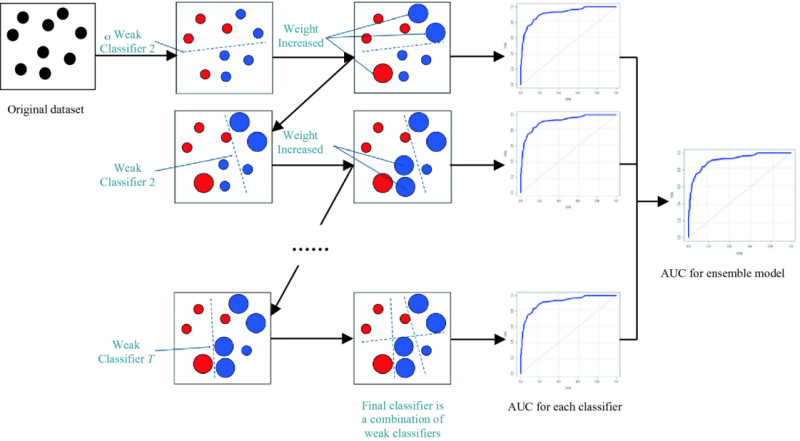

Fuente: https://datascience.eu/machine-learning/gradient-boosting-what-you-need-to-know/

### **Algoritmo Adaboost**

##### **Características**

* Se inicia con un muestreo de datos (es decir, una sub-muestra) que es recogida mediante muestreo aleatorio con reemplazo

* Va ajustando los pesos de los learners débiles a medida que el algoritmo va entrenando y 

En AdaBoost, los pesos de los weak learners ($\alpha_t$) se calculan con la fórmula:

$$
\alpha_t = \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$

Donde:

- $\epsilon_t$ es el error de clasificación ponderado del weak learner.

Texto asociado a la gráfica sacado del [post](https://medium.com/@toprak.mhmt/gradient-boosting-and-weak-learners-1f93726b6fbd)


***Preste atención a los colores de los signos más y menos: los más deben estar en la sección azul y los menos en la roja. El límite de decisión del árbol se puede interpretar como la línea trazada entre las secciones roja y azul. Como puede ver arriba, los ejemplos que se clasificaron incorrectamente son más grandes en la siguiente iteración, mientras que los ejemplos que se clasificaron correctamente son más pequeños. A medida que combinamos los límites de decisión de cada nuevo clasificador, terminamos con un clasificador que clasifica correctamente todos los ejemplos.***

***Conclusión clave: Adaboost crea nuevos clasificadores al influir continuamente en la distribución de los datos muestreados para entrenar a cada alumno sucesivo.***

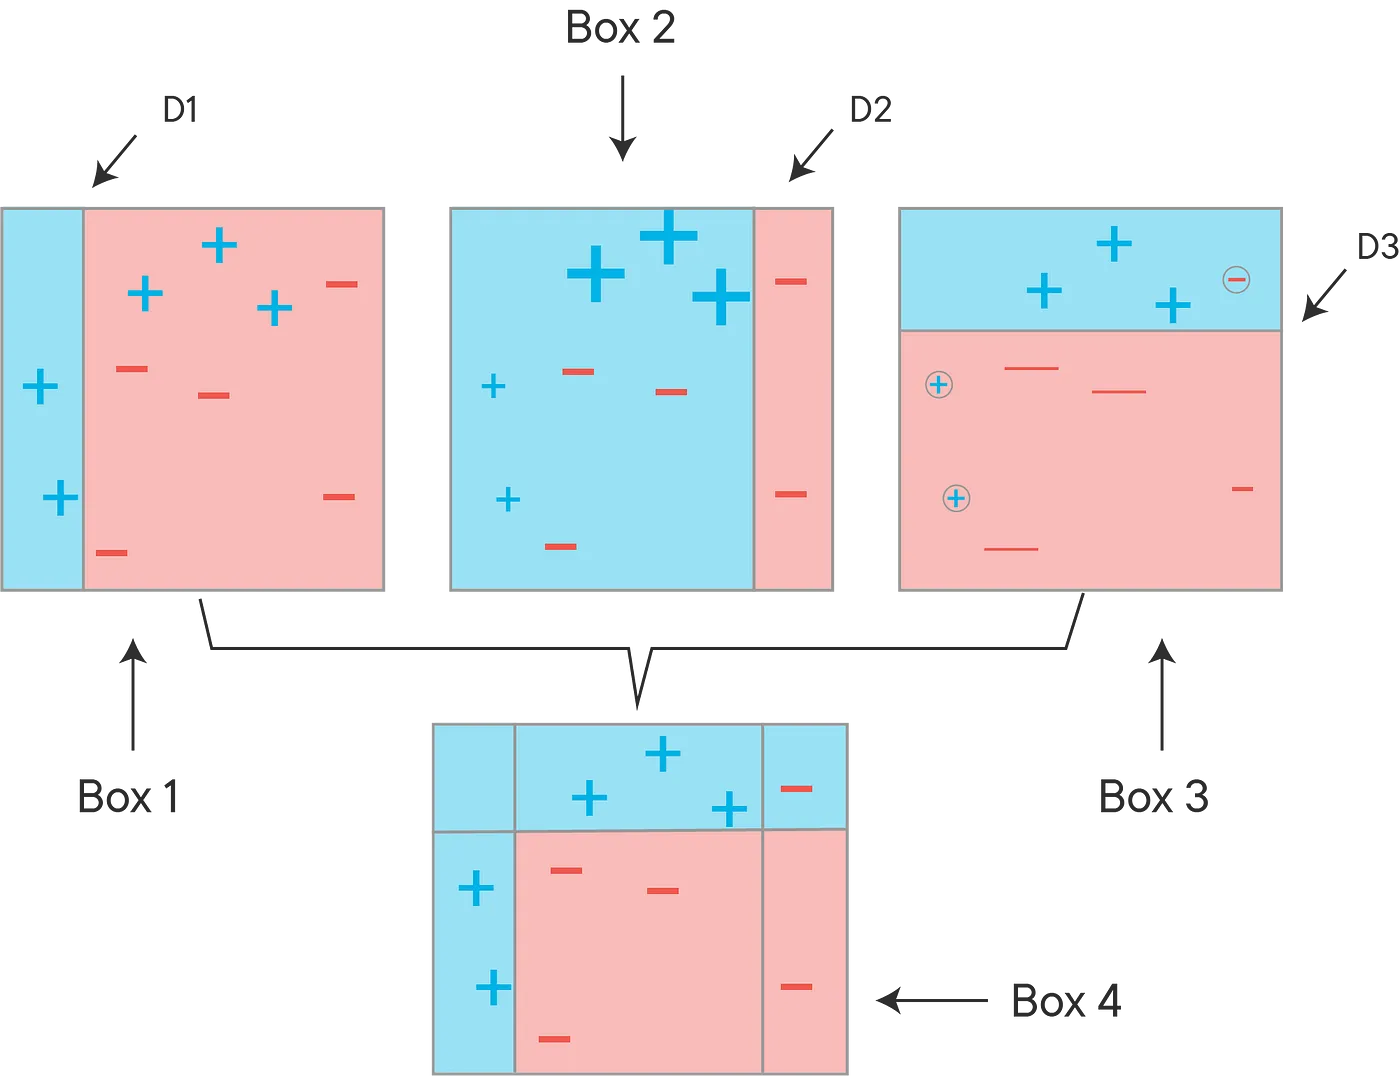

**SAMME vs SAMME.R en AdaBoost**

AdaBoost admite dos variantes principales: **SAMME** (Discrete) y **SAMME.R** (Real). Ambos son algoritmos de boosting, pero difieren en cómo calculan y combinan las contribuciones de los weak learners.

---

**1. SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss)**
- **Tipo**: Boosting discreto.
- **Salidas de los weak learners**:
  - Utiliza **predicciones categóricas** (clases) de los weak learners.
  - Los weak learners devuelven directamente la clase asignada (por ejemplo, `0` o `1`).
- **Cálculo de los pesos de los weak learners**:
  - Basado en el **error de clasificación ponderado** (\(\epsilon_t\)) de cada weak learner:
    \[
    \alpha_t = \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right) + \ln(K - 1)
    \]
    Donde \(K\) es el número de clases.
- **Predicción final**:
  - La predicción final se obtiene mediante una votación ponderada por los pesos (\(\alpha_t\)) de los weak learners.

---

**2. SAMME.R (Real)**
- **Tipo**: Boosting real.
- **Salidas de los weak learners**:
  - Utiliza las **probabilidades de clase** estimadas por los weak learners en lugar de predicciones categóricas.
  - Requiere que los weak learners devuelvan probabilidades (por ejemplo, árboles con `predict_proba`).
- **Cálculo de los pesos de los weak learners**:
  - Los pesos se derivan de las probabilidades en lugar del error de clasificación:
    \[
    F_t(x) = \sum_{t=1}^T \alpha_t h_t(x)
    \]
    Donde \(F_t(x)\) es el puntaje acumulado para cada clase y \(h_t(x)\) las probabilidades del weak learner.
- **Predicción final**:
  - Utiliza la suma ponderada de las probabilidades de los weak learners para determinar la clase final.

---

**Diferencias Clave**
| Característica         | **SAMME**                  | **SAMME.R**                 |
|------------------------|----------------------------|-----------------------------|
| **Tipo**              | Boosting discreto          | Boosting real               |
| **Salidas**           | Predicciones categóricas   | Probabilidades              |
| **Cálculo de pesos**  | Basado en el error (\(\epsilon_t\)) | Basado en probabilidades    |
| **Convergencia**      | Requiere más iteraciones   | Converge más rápido         |
| **Compatibilidad**    | Funciona con cualquier weak learner | Requiere `predict_proba` en el modelo base |

---

**Conclusión**
- Usa **SAMME.R** cuando los weak learners puedan proporcionar probabilidades, ya que converge más rápido y utiliza información adicional.
- Usa **SAMME** cuando los weak learners solo devuelvan predicciones de clase y no probabilidades.

Fuente: texto generado por Chat GPT con el modelo 4o

##### **Implementación en código**

Exactitud en el conjunto de prueba: 0.92


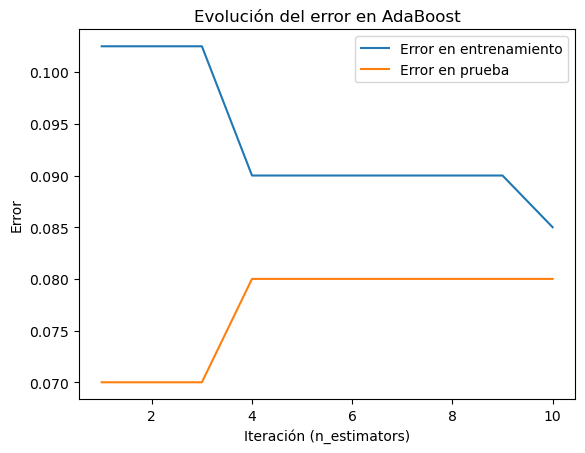

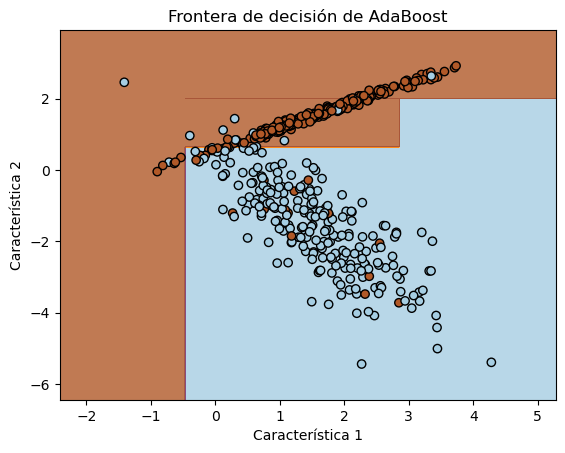

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# Suprimir advertencias específicas de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear un conjunto de datos simple para clasificación
np.random.seed(42)
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=1.5,
    random_state=42
)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de AdaBoost con un weak learner (árbol de decisión)
n_estimators = 10  # Número de iteraciones
base_model = DecisionTreeClassifier(max_depth=1)  # Árbol simple como weak learner
# Configuración de AdaBoost con el algoritmo SAMME
ada_model = AdaBoostClassifier(
    base_model,
    n_estimators=n_estimators,
    learning_rate=0.7,
    algorithm="SAMME.R",
    random_state=42
)

# Ajustar el modelo de AdaBoost
ada_model.fit(X_train, y_train)

# Predicciones finales
y_pred = ada_model.predict(X_test)

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.2f}")

# Monitorear las predicciones de cada iteración
train_errors = []
test_errors = []

for stage_pred in ada_model.staged_predict(X_train):
    train_error = 1 - accuracy_score(y_train, stage_pred)
    train_errors.append(train_error)

for stage_pred in ada_model.staged_predict(X_test):
    test_error = 1 - accuracy_score(y_test, stage_pred)
    test_errors.append(test_error)

# Visualizar errores
plt.plot(range(1, n_estimators + 1), train_errors, label="Error en entrenamiento")
plt.plot(range(1, n_estimators + 1), test_errors, label="Error en prueba")
plt.xlabel("Iteración (n_estimators)")
plt.ylabel("Error")
plt.title("Evolución del error en AdaBoost")
plt.legend()
plt.show()

# Visualización de la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = ada_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Frontera de decisión de AdaBoost")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [52]:
# Crear un DataFrame para mostrar los pesos y errores de los estimadores
estimator_data = {
    "Estimator Index": list(range(1, len(ada_model.estimator_weights_) + 1)),
    "Estimator Weight": ada_model.estimator_weights_,
    "Estimator Error": ada_model.estimator_errors_,
}

estimator_df = pd.DataFrame(estimator_data)
# Mostrar la tabla
print(estimator_df)

    Estimator Index  Estimator Weight  Estimator Error
0                 1          1.080764         0.205714
1                 2          0.680732         0.299241
2                 3          0.741899         0.283458
3                 4          0.631000         0.312437
4                 5          0.717208         0.289768
5                 6          0.557438         0.332523
6                 7          0.309614         0.404435
7                 8          0.408335         0.375095
8                 9          0.315210         0.402752
9                10          0.507323         0.346569
10               11          0.240916         0.425278
11               12          0.452339         0.362293
12               13          0.412721         0.373811
13               14          0.301563         0.406862
14               15          0.198316         0.438342


##### **Efectos de la escala de los Errores**

Si los errores ($\epsilon_t$) están en un rango similar (por ejemplo, entre 0.4 y 0.5 en tu tabla), los valores de:

$$
\ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$

pueden converger hacia valores similares, resultando en pesos iguales.

**Ejemplo:**
Para errores cercanos a 0.5:

$$
\ln\left(\frac{1 - 0.46}{0.46}\right) \approx 0.08, \quad \ln\left(\frac{1 - 0.48}{0.48}\right) \approx 0.04
$$

La diferencia en los pesos es mínima.

---

**Solución a este problema**
Ajusta los weak learners y/o introduce más variabilidad en los datos para diversificar los errores y/o aumenta el número de iteraciones.

##### **Efecto del algoritmo que usa Adaboost sobre los pesos**

En SAMME.R, los weak learners no tienen pesos explícitos asignados para combinarse en el ensemble final, sino que su salida es utilizada directamente como una probabilidad para ponderar las predicciones finales. Por eso, los valores en estimator_weights_ no varían.

##### **Ajustamos el modelo para mostrar el efecto deseado en cambio de pesos**

Esto se logra ajustando los datos, los weak learners y el número de iteraciones para garantizar que los errores varíen lo suficiente entre las iteraciones:

Pesos y errores de los weak learners:
    Estimator Index  Estimator Weight  Estimator Error
0                 1          1.031304         0.216000
1                 2          0.625887         0.313812
2                 3          0.839151         0.259429
3                 4          0.562145         0.331218
4                 5          0.581364         0.325918
5                 6          0.326230         0.399443
6                 7          0.501931         0.348097
7                 8          0.327104         0.399181
8                 9          0.352222         0.391675
9                10          0.298815         0.407691
10               11          0.328718         0.398697
11               12          0.269048         0.416706
12               13          0.203772         0.436663
13               14          0.299977         0.407340
14               15          0.225189         0.430090


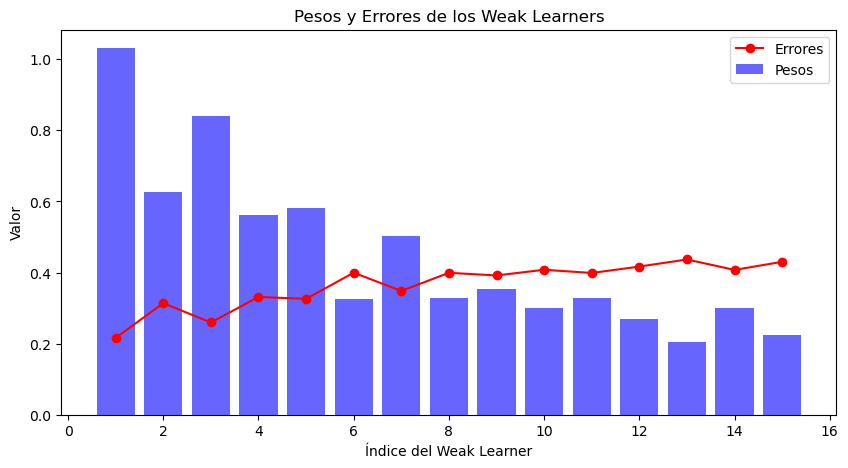

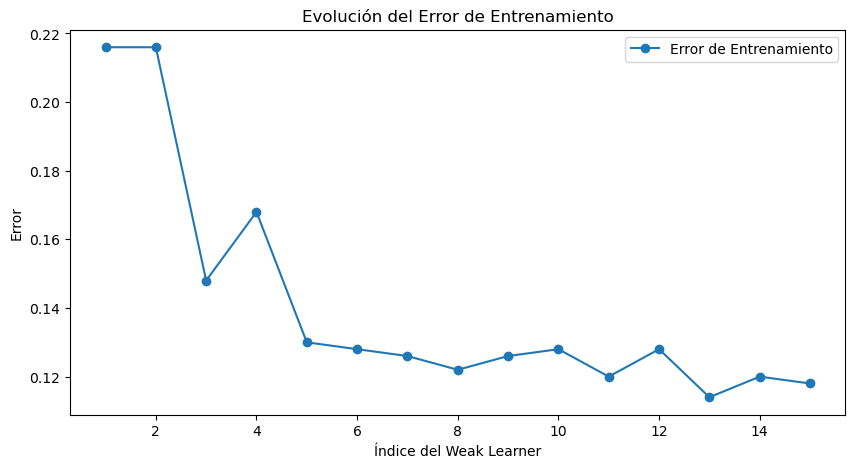

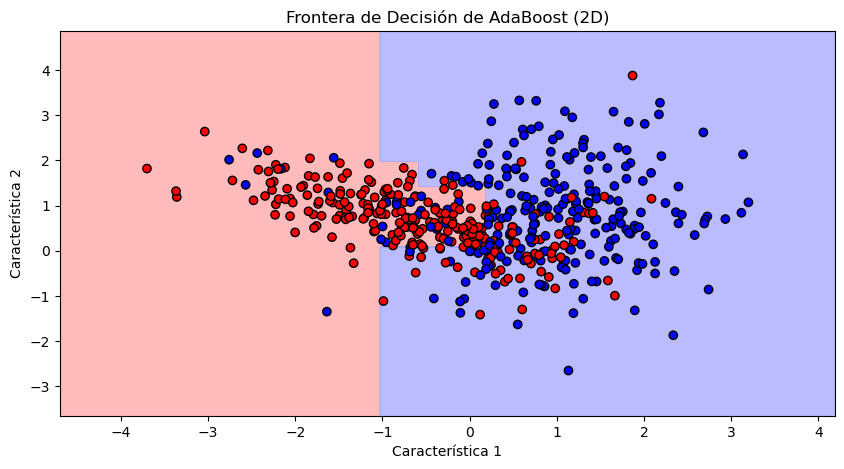

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Crear un conjunto de datos con más complejidad
np.random.seed(42)
X, y = make_classification(
    n_samples=500,
    n_features=5,  # Aumentar las características para más variabilidad
    n_informative=3,
    n_redundant=1,
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=0.8,  # Reducir la separación de clases para hacer el problema más difícil
    random_state=42
)

# Configuración del modelo base y AdaBoost
base_model = DecisionTreeClassifier(max_depth=2)  # Árbol con profundidad limitada
ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=15,
    learning_rate=0.8,
    algorithm="SAMME",  # Cambiar a SAMME
    random_state=42
)

# Entrenar el modelo de AdaBoost
ada_model.fit(X, y)

# Obtener los pesos y errores de los weak learners
estimator_weights = ada_model.estimator_weights_
estimator_errors = ada_model.estimator_errors_

# Crear un DataFrame para mostrar los pesos y errores de los weak learners
estimator_data = {
    "Estimator Index": list(range(1, len(estimator_weights) + 1)),
    "Estimator Weight": estimator_weights,
    "Estimator Error": estimator_errors,
}
estimator_df = pd.DataFrame(estimator_data)

# Mostrar los resultados en la consola
print("Pesos y errores de los weak learners:")
print(estimator_df)

# Visualizar los pesos y errores
plt.figure(figsize=(10, 5))
plt.bar(estimator_data["Estimator Index"], estimator_weights, color="blue", alpha=0.6, label="Pesos")
plt.plot(estimator_data["Estimator Index"], estimator_errors, marker="o", color="red", label="Errores")
plt.xlabel("Índice del Weak Learner")
plt.ylabel("Valor")
plt.title("Pesos y Errores de los Weak Learners")
plt.legend()
plt.show()

# Monitorear las predicciones de cada iteración para calcular los errores
train_errors = []
test_errors = []

for stage_pred in ada_model.staged_predict(X):
    train_error = 1 - accuracy_score(y, stage_pred)
    train_errors.append(train_error)

# Visualizar los errores de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_errors) + 1), train_errors, marker="o", label="Error de Entrenamiento")
plt.xlabel("Índice del Weak Learner")
plt.ylabel("Error")
plt.title("Evolución del Error de Entrenamiento")
plt.legend()
plt.show()

# Visualización de la frontera de decisión (usando solo dos características para graficar)
X_2d = X[:, :2]  # Tomar las dos primeras características para la gráfica

ada_model_2d = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=15,
    learning_rate=0.8,
    algorithm="SAMME",
    random_state=42
)
ada_model_2d.fit(X_2d, y)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = ada_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["#FF0000", "#0000FF"]))
plt.title("Frontera de Decisión de AdaBoost (2D)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


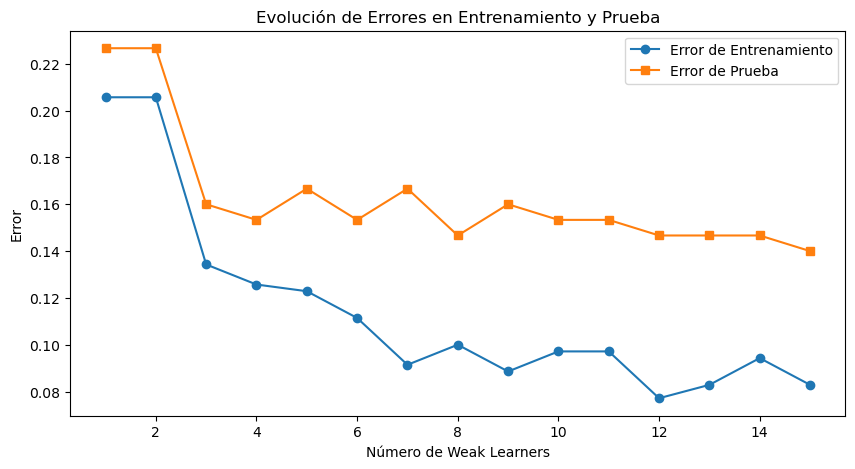

    Estimator Index  Estimator Weight  Estimator Error
0                 1          1.080764         0.205714
1                 2          0.680732         0.299241
2                 3          0.741899         0.283458
3                 4          0.631000         0.312437
4                 5          0.717208         0.289768
5                 6          0.557438         0.332523
6                 7          0.309614         0.404435
7                 8          0.408335         0.375095
8                 9          0.315210         0.402752
9                10          0.507323         0.346569
10               11          0.240916         0.425278
11               12          0.452339         0.362293
12               13          0.412721         0.373811
13               14          0.301563         0.406862
14               15          0.198316         0.438342


In [53]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configuración del modelo base y AdaBoost
base_model = DecisionTreeClassifier(max_depth=2)  # Árbol con profundidad limitada
ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=15,
    learning_rate=0.8,
    algorithm="SAMME",  # Cambiar a SAMME
    random_state=42
)

# Entrenar el modelo de AdaBoost
ada_model.fit(X_train, y_train)

# Obtener los errores en cada iteración
train_errors = []
test_errors = []

for train_pred, test_pred in zip(ada_model.staged_predict(X_train), ada_model.staged_predict(X_test)):
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar errores de entrenamiento y prueba
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_errors) + 1), train_errors, marker="o", label="Error de Entrenamiento")
plt.plot(range(1, len(test_errors) + 1), test_errors, marker="s", label="Error de Prueba")
plt.xlabel("Número de Weak Learners")
plt.ylabel("Error")
plt.title("Evolución de Errores en Entrenamiento y Prueba")
plt.legend()
plt.show()

# Mostrar pesos y errores como antes
estimator_weights = ada_model.estimator_weights_
estimator_errors = ada_model.estimator_errors_

estimator_data = {
    "Estimator Index": list(range(1, len(estimator_weights) + 1)),
    "Estimator Weight": estimator_weights,
    "Estimator Error": estimator_errors,
}
estimator_df = pd.DataFrame(estimator_data)
print(estimator_df)


### **Gradient Boosting**

**Función de pérdida o función de error (Loss function)**

* Calcula el error entre lo que predices y lo que realmente es

**Gradiente descendente**

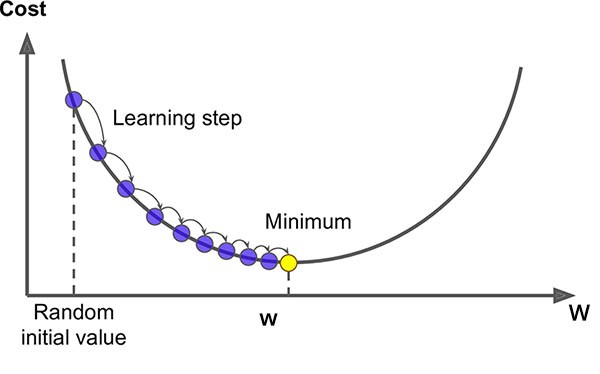

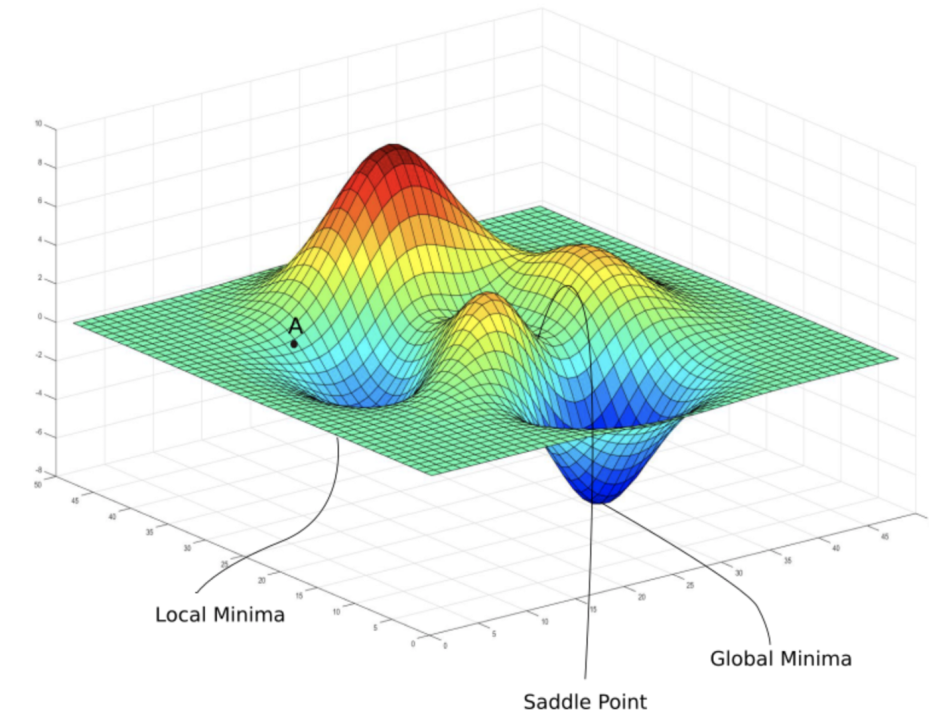

#### Código: Implementación del Gradiente Descendente Manual

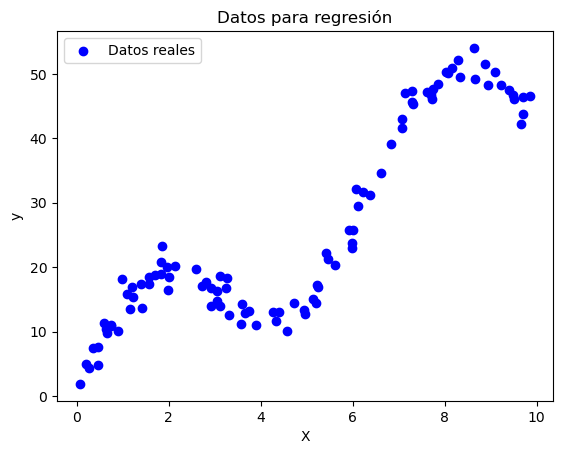

Iteración 1
Error cuadrático medio: 584.8857
----------------------------------------
Iteración 2
Error cuadrático medio: 376.5015
----------------------------------------
Iteración 3
Error cuadrático medio: 243.0694
----------------------------------------
Iteración 4
Error cuadrático medio: 157.5554
----------------------------------------
Iteración 5
Error cuadrático medio: 102.6009
----------------------------------------


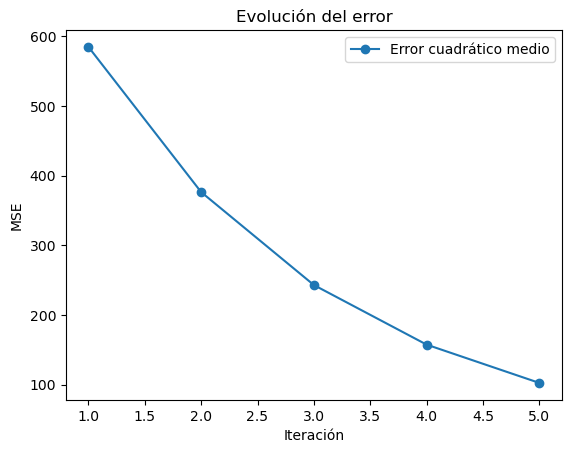

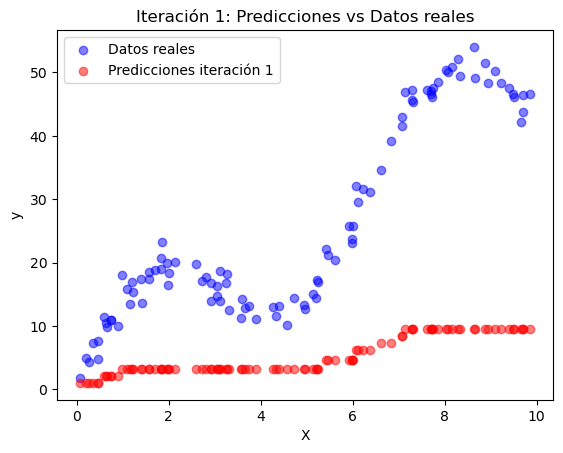

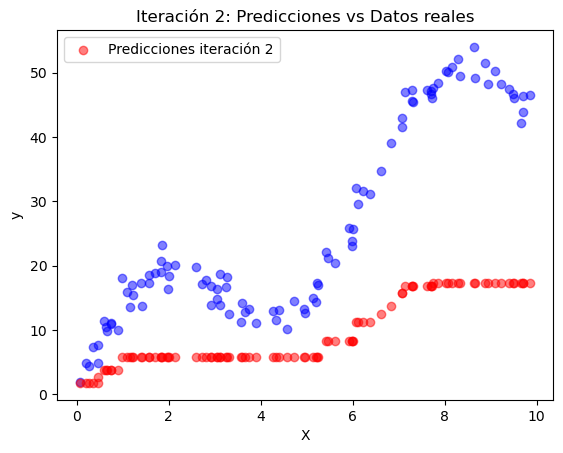

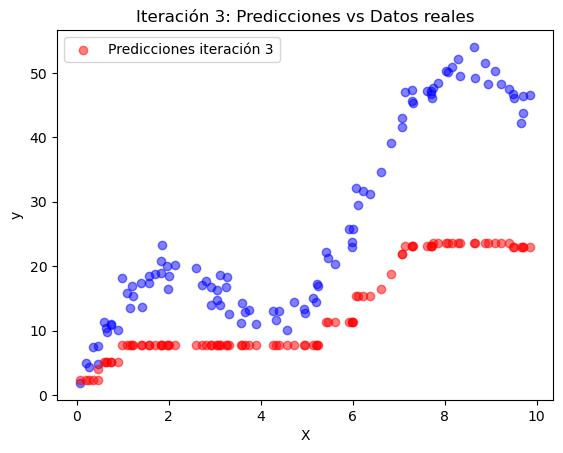

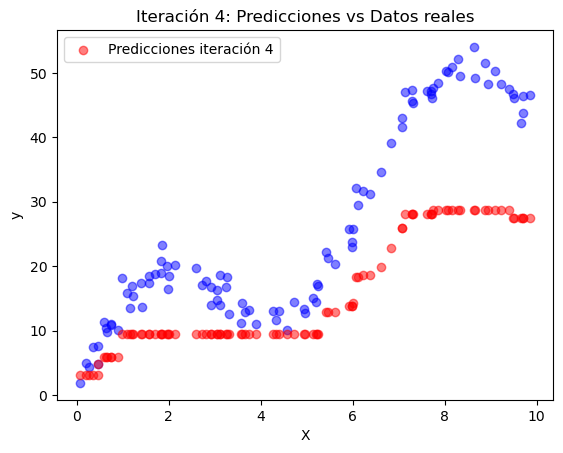

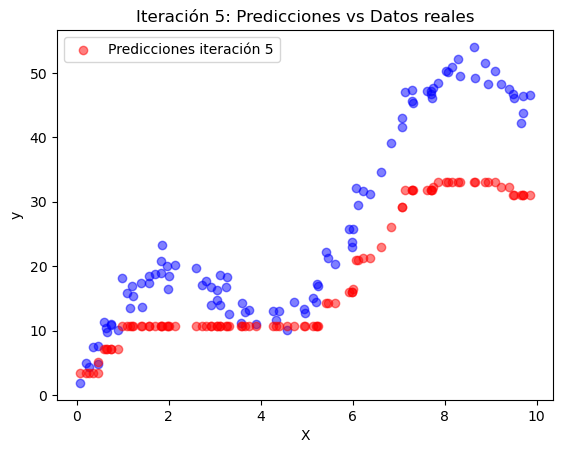

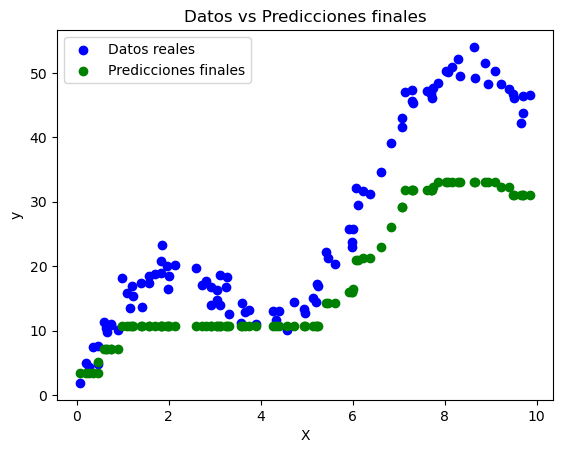

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear un conjunto de datos simple
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Una característica, valores entre 0 y 10
y = 5 * X[:, 0] + np.sin(X[:, 0]) * 10 + np.random.randn(100) * 2  # Relación no lineal con ruido

# Visualizar los datos
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos para regresión')
plt.legend()
plt.show()

# Configuración inicial
n_iterations = 5
learning_rate = 0.2  # Tasa de aprendizaje
predictions = np.zeros_like(y)  # Predicciones iniciales

# Listas para guardar modelos, errores y predicciones en cada iteración
models = []
errors = []
predictions_per_step = []

# Gradiente Boosting manual paso a paso
for i in range(n_iterations):
    # Calcular los residuos para la iteración anterior (con la excepción de la 1era iteración)
    residuals = y - predictions

    # Ajustar un weak learner (árbol de decisión) a los residuos
    model = DecisionTreeRegressor(max_depth=3, random_state=42)
    # Actualizo el modelo usando los residuos calculados para la iteración anterior
    model.fit(X, residuals)
    models.append(model)

    # Actualizar las predicciones
    update = model.predict(X)
    predictions += learning_rate * update

    # Guardar las predicciones y el error
    predictions_per_step.append(predictions.copy())
    mse = np.mean((y - predictions) ** 2)
    errors.append(mse)

    # Mostrar información de la iteración
    print(f"Iteración {i + 1}")
    print(f"Error cuadrático medio: {mse:.4f}")
    print("-" * 40)

# Visualizar el error a lo largo de las iteraciones
plt.plot(range(1, n_iterations + 1), errors, marker='o', label='Error cuadrático medio')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Evolución del error')
plt.legend()
plt.show()

# Visualizar las predicciones en cada iteración
for i, step_predictions in enumerate(predictions_per_step, start=1):
    plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales' if i == 1 else "")
    plt.scatter(X, step_predictions, color='red', alpha=0.5, label=f'Predicciones iteración {i}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Iteración {i}: Predicciones vs Datos reales')
    plt.legend()
    plt.show()

# Visualizar las predicciones finales
plt.scatter(X, y, color='blue', label='Datos reales')
plt.scatter(X, predictions, color='green', label='Predicciones finales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos vs Predicciones finales')
plt.legend()
plt.show()

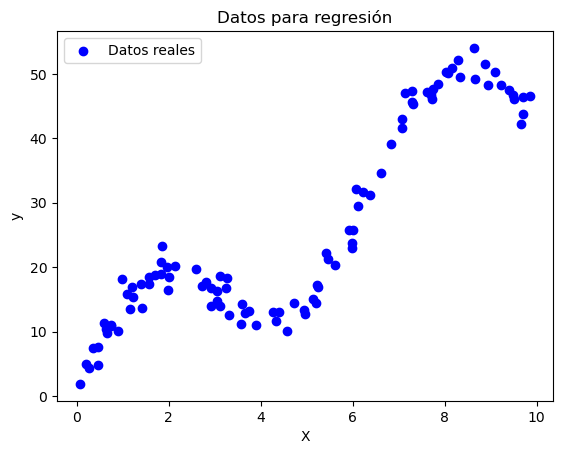

Iteración 1
Error absoluto medio: 20.7668
----------------------------------------
Iteración 2
Error absoluto medio: 16.6134
----------------------------------------
Iteración 3
Error absoluto medio: 13.3000
----------------------------------------
Iteración 4
Error absoluto medio: 10.6580
----------------------------------------
Iteración 5
Error absoluto medio: 8.5501
----------------------------------------


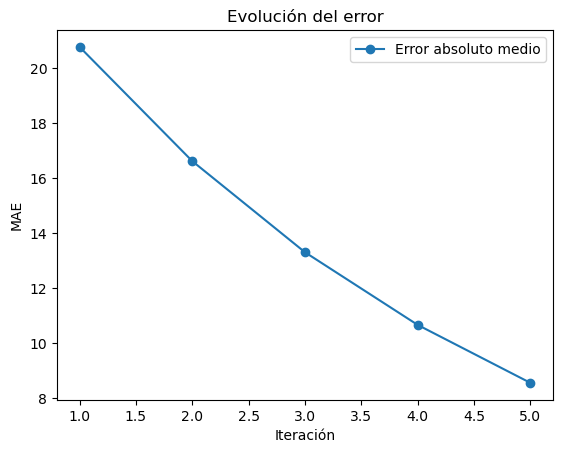

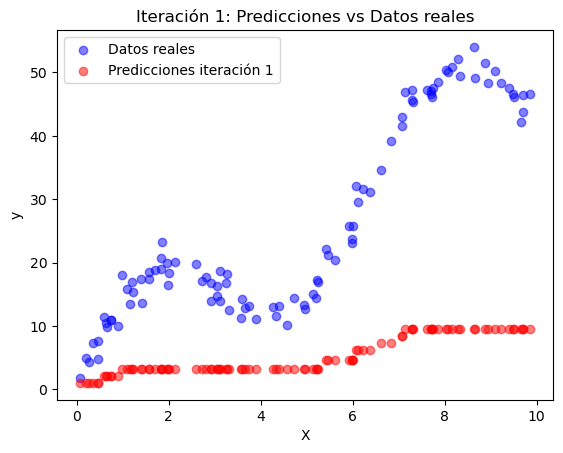

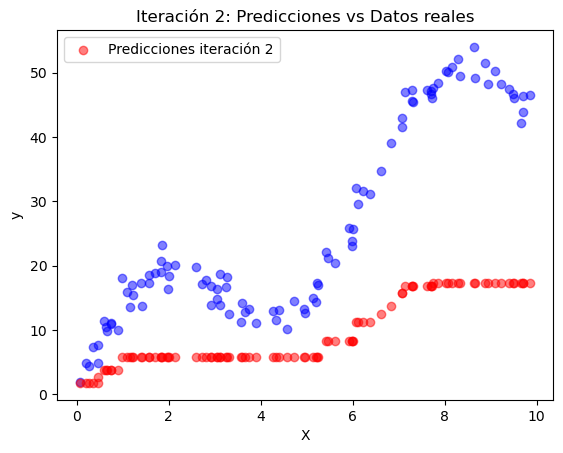

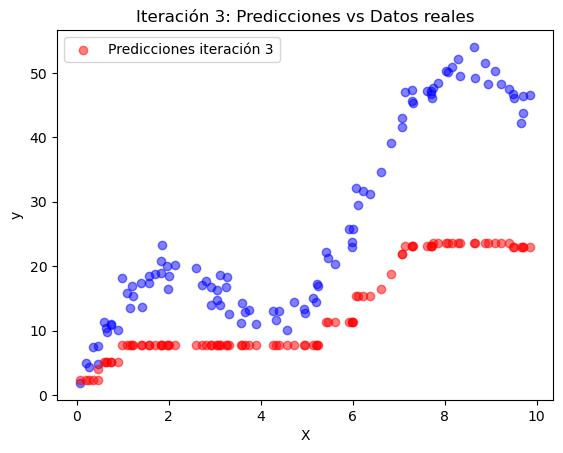

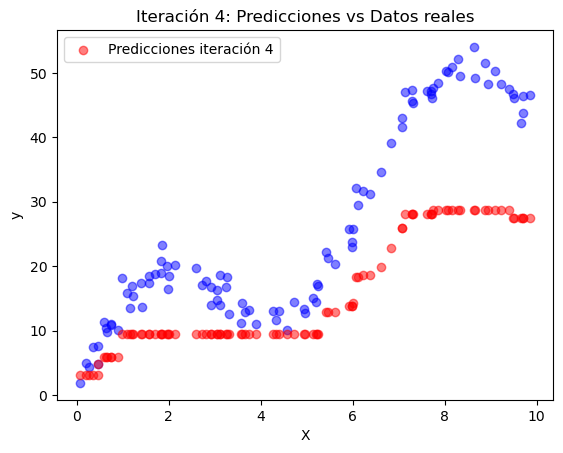

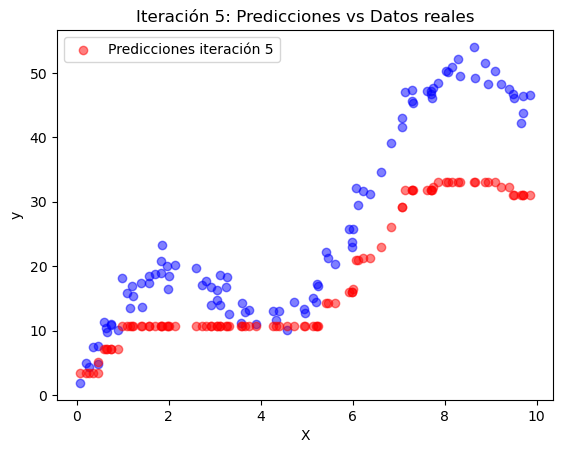

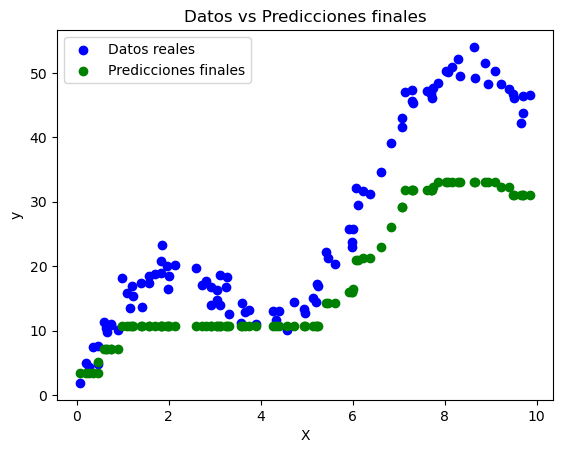

In [15]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear un conjunto de datos simple
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Una característica, valores entre 0 y 10
y = 5 * X[:, 0] + np.sin(X[:, 0]) * 10 + np.random.randn(100) * 2  # Relación no lineal con ruido

# Visualizar los datos
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos para regresión')
plt.legend()
plt.show()

# Configuración inicial
n_iterations = 5
learning_rate = 0.2  # Tasa de aprendizaje
predictions = np.zeros_like(y)  # Predicciones iniciales

# Listas para guardar modelos, errores y predicciones en cada iteración
models = []
errors = []
predictions_per_step = []

# Gradiente Boosting manual paso a paso
for i in range(n_iterations):
    # Calcular los residuos para la iteración anterior (con la excepción de la 1era iteración)
    residuals = y - predictions

    # Ajustar un weak learner (árbol de decisión) a los residuos
    model = DecisionTreeRegressor(max_depth=3, random_state=42)
    # Actualizo el modelo usando los residuos calculados para la iteración anterior
    model.fit(X, residuals)
    models.append(model)

    # Actualizar las predicciones
    update = model.predict(X)
    predictions += learning_rate * update

    # Guardar las predicciones y el error
    predictions_per_step.append(predictions.copy())
    mae = np.mean(abs(y - predictions))
    errors.append(mae)

    # Mostrar información de la iteración
    print(f"Iteración {i + 1}")
    print(f"Error absoluto medio: {mae:.4f}")
    print("-" * 40)

# Visualizar el error a lo largo de las iteraciones
plt.plot(range(1, n_iterations + 1), errors, marker='o', label='Error absoluto medio')
plt.xlabel('Iteración')
plt.ylabel('MAE')
plt.title('Evolución del error')
plt.legend()
plt.show()

# Visualizar las predicciones en cada iteración
for i, step_predictions in enumerate(predictions_per_step, start=1):
    plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales' if i == 1 else "")
    plt.scatter(X, step_predictions, color='red', alpha=0.5, label=f'Predicciones iteración {i}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Iteración {i}: Predicciones vs Datos reales')
    plt.legend()
    plt.show()

# Visualizar las predicciones finales
plt.scatter(X, y, color='blue', label='Datos reales')
plt.scatter(X, predictions, color='green', label='Predicciones finales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos vs Predicciones finales')
plt.legend()
plt.show()

### Ejemplo en código usando GradientBoostingClassifier de la librería de sklearn para un problema de clasificación

Fuente: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [17]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generar un conjunto de datos de ejemplo
from sklearn.datasets import make_classification

# Crear un conjunto de datos sintético
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar un modelo de Gradient Boosting
model = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles (learners débiles son árboles de decisión en esta implementación)
    learning_rate=0.1, # Tasa de aprendizaje --> cuánto aprendizaje de lo obtenido en la iteración incorporo
    max_depth=3,       # Profundidad máxima de los árboles
    random_state=42    # Semilla para reproducibilidad, pues fija el punto de partida
    # Dos parámetros que nos entregan para mover las métricas que vamos a optimizar
    # loss --> la función de pérdida a ser optimizada
    # criterion  --> la función para medir la calidad de splits en los árboles
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Mostrar un reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Exactitud del modelo: 0.88
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       132
           1       0.86      0.89      0.88       118

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



## Overfitting

### ¿Cómo detectar si hay Overfitting?

#### División en datos de entrenamiento y prueba

#### Medir el error en ambos conjuntos de datos

### ¿Cómo prevenir?

#### Regularización

Si detectas overfitting, puedes aplicar técnicas de regularización:

* Reducir la complejidad del weak learner: Usa árboles más pequeños (max_depth=2).
* Reducir la tasa de aprendizaje (learning_rate): Ayuda a suavizar el proceso de ajuste.
* Aumentar los datos: Introducir más datos de entrenamiento, si es posible.
* Early Stopping: Detén las iteraciones si el error en prueba deja de mejorar.

## Optimización

### Gridseach

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear un conjunto de datos sintético
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Configurar el modelo base
gb_model = GradientBoostingClassifier(random_state=42)

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 particiones
    scoring='accuracy',  # Métrica de evaluación
    verbose=1,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.2f}")

# Reporte de clasificación
print("Reporte de Clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Exactitud en el conjunto de prueba: 0.94
Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       106
           1       0.93      0.95      0.94        94

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

